## Crisp DM framework
- Business Understanding
- Data Understanding
- Data preparation
- Modeling building
- model Deployment

## Starting EDA 
- Visualising data
- Cleaning data
- Performing EDA

## Technique used - Supervised learning 
- Past data with labels is used for building the model
- Regression and classification algorithms fall under this category


## In this notebook, I have built a Multiple Linear regression model to solve the Bike sharing assignment problem

## Solution approach

1. Reading, understanding and visualising the data
2. Preparing data for modeling (train and test split, rescaling etc..)
3. Training the mode with 70% training data
4. Residual analysis
5. Prediction and evaluation on the 30% test data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Step-1 Reading and Understanding the Data

In [2]:
# Read the data
bikeshare = pd.read_csv("C:\\Users\\Family.DESKTOP-IPLKUJ5\\Downloads\\day.csv")
bikeshare.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Start EDA
bikeshare.shape

(730, 16)

- Observations: All column and rows are present

In [4]:
bikeshare.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Understand the statistics of the data -> count, mean, std, min, max

In [5]:

bikeshare.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

- Visualising of all numeric variables

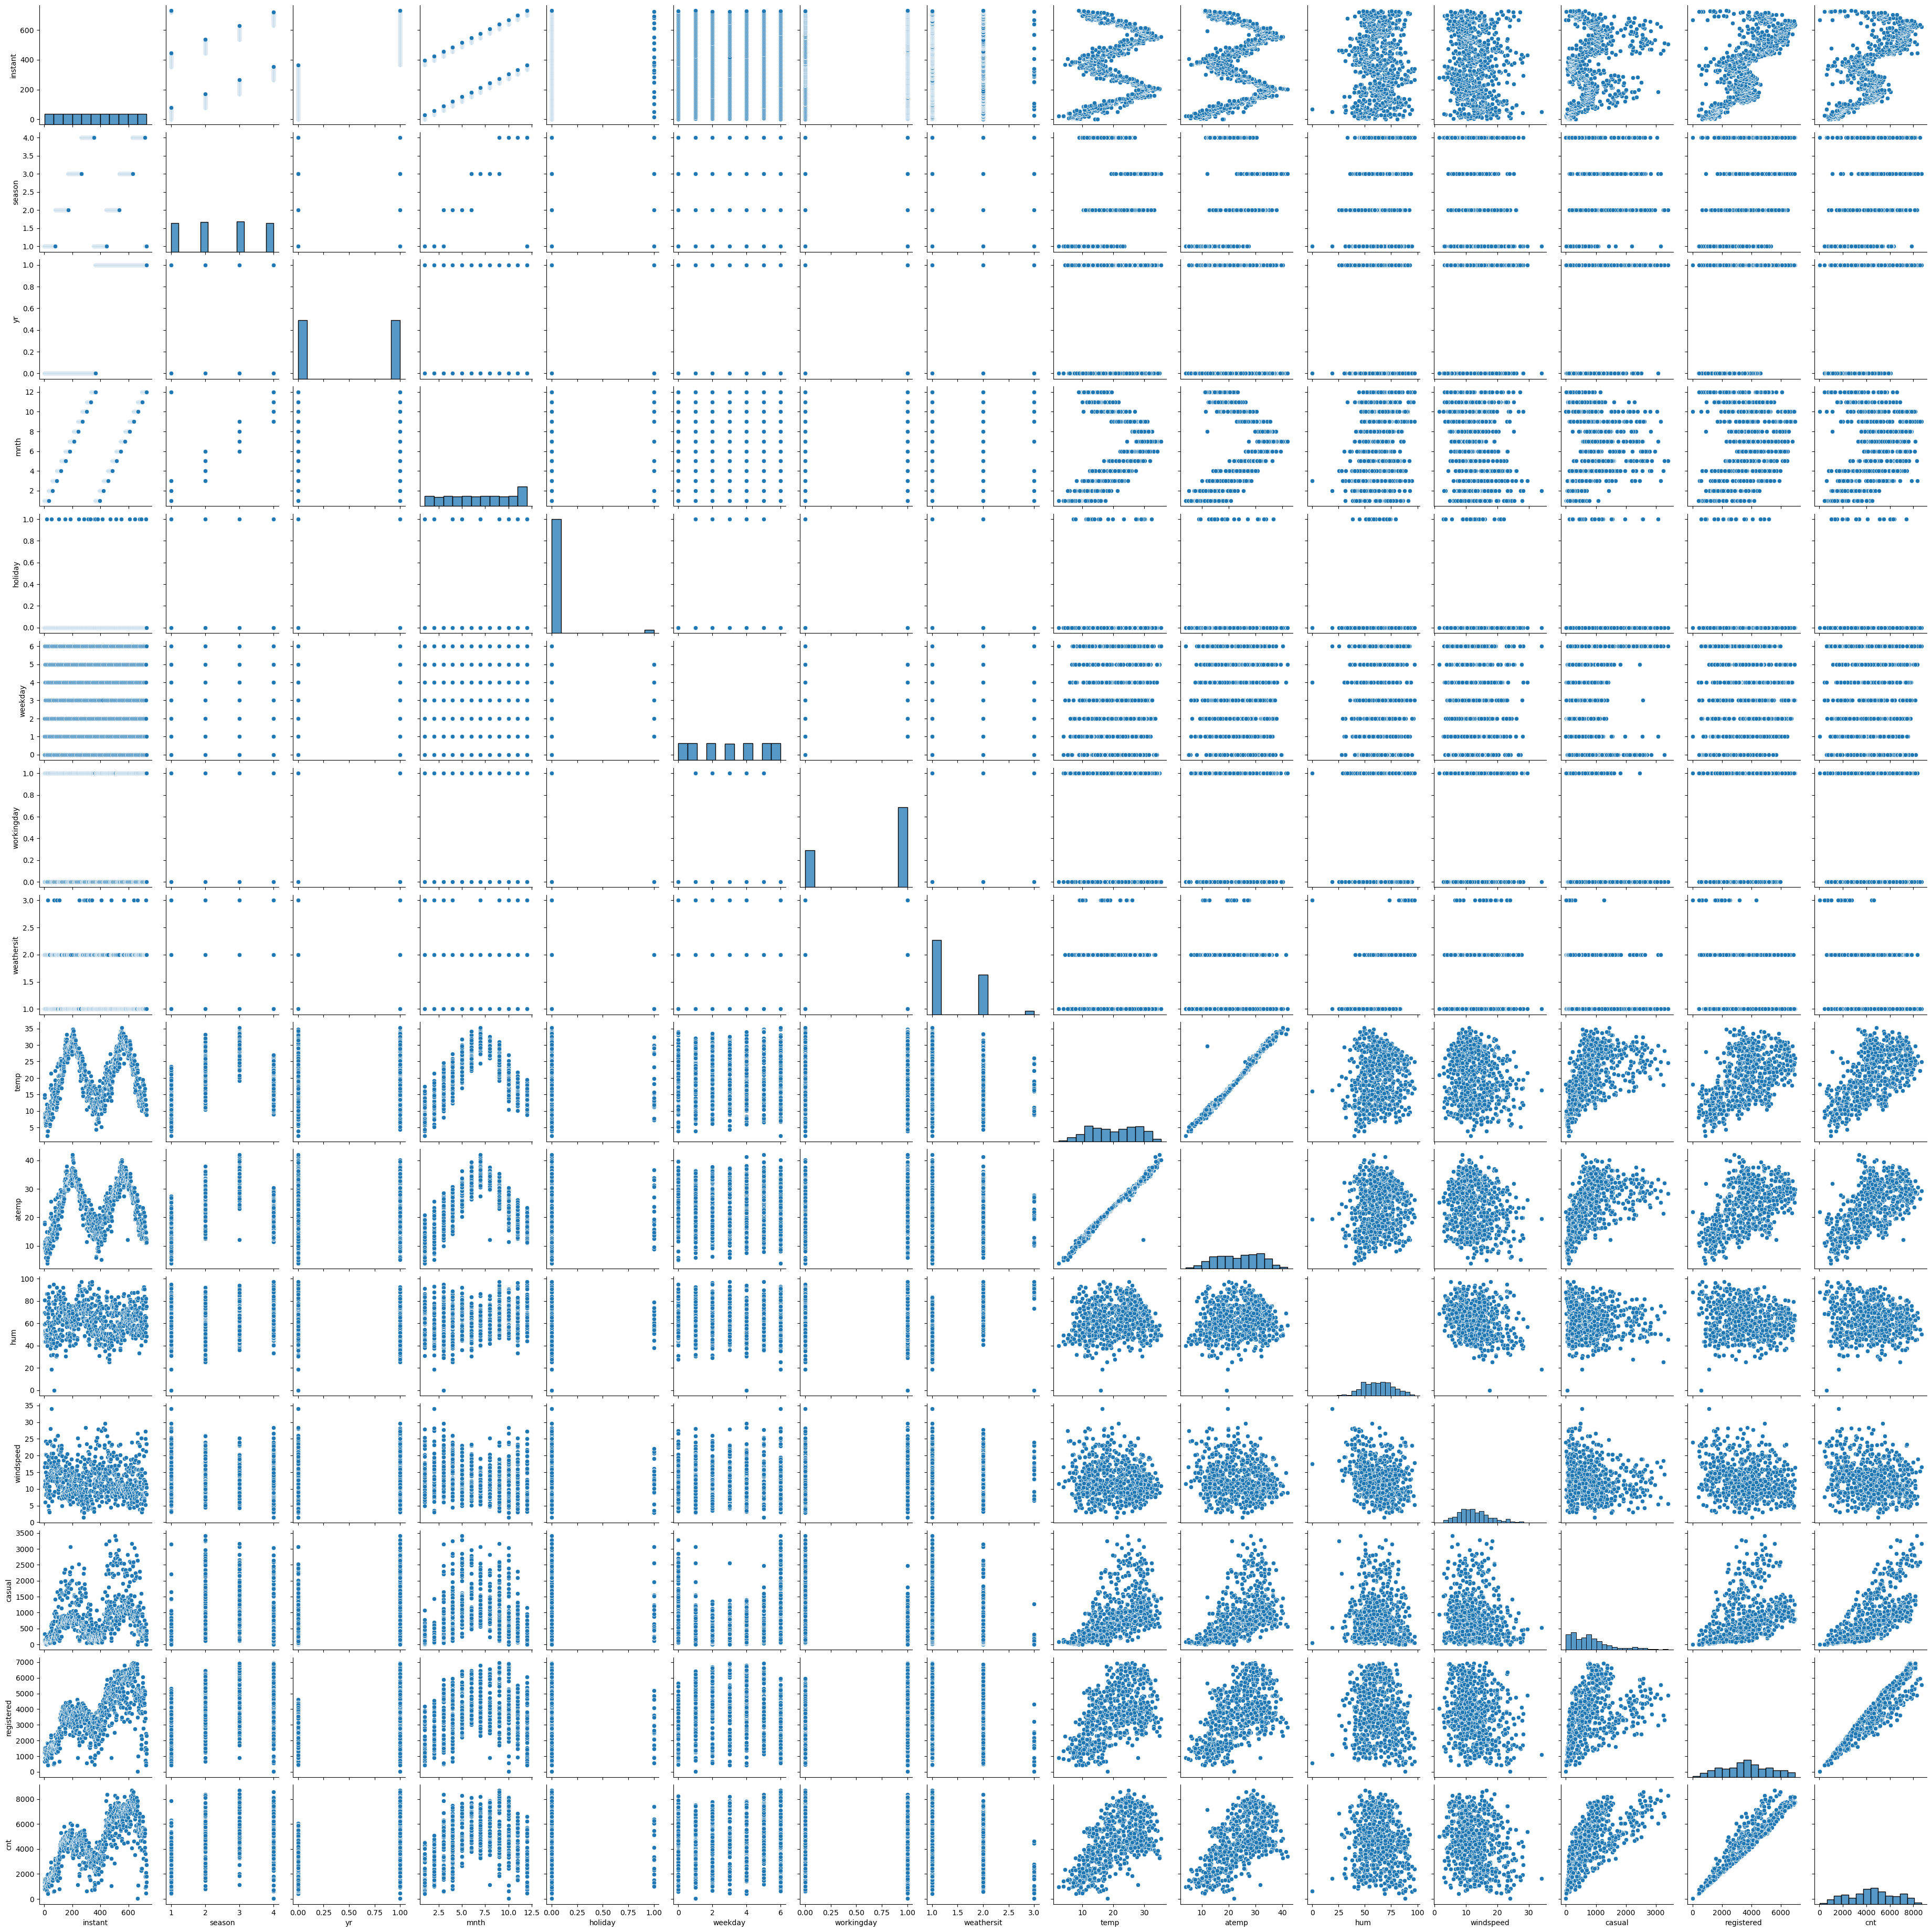

In [6]:
sns.pairplot(bikeshare)
plt.show()

- Visualising categorical variables

<Axes: xlabel='weathersit', ylabel='cnt'>

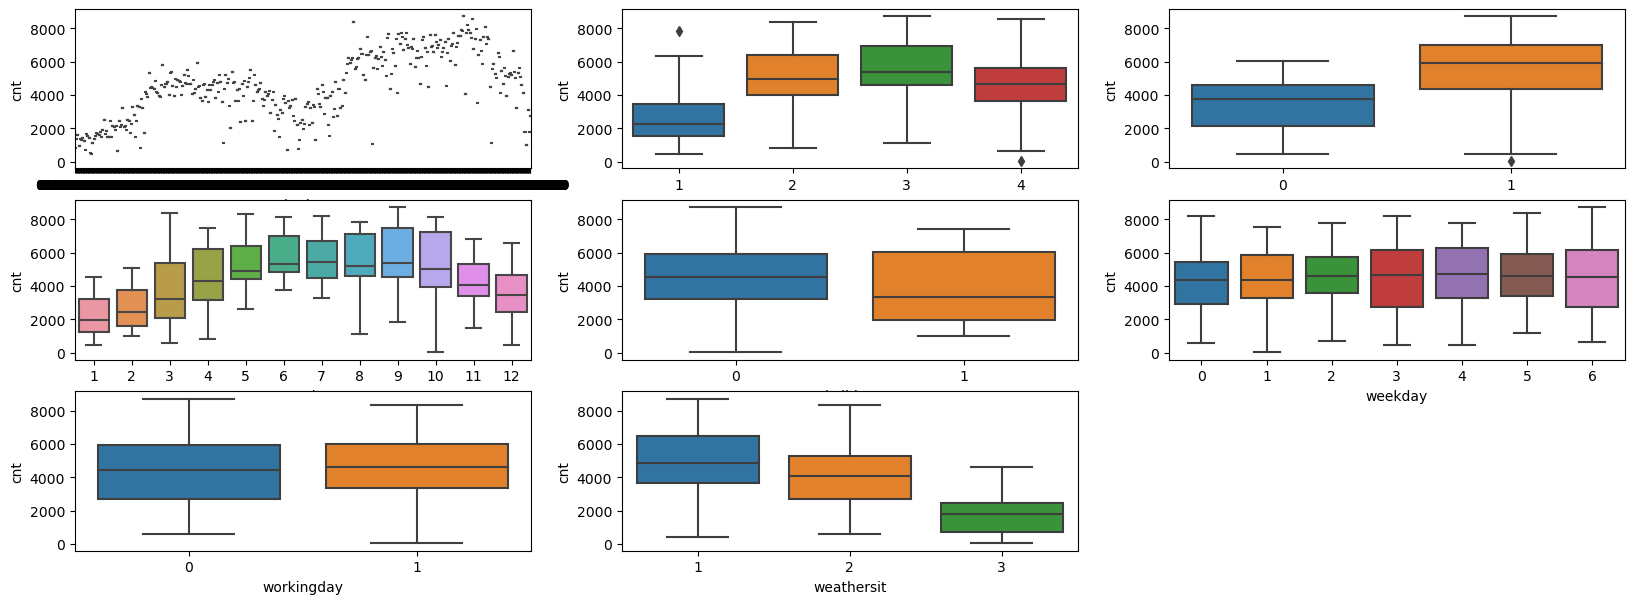

In [7]:

plt.figure(figsize=(20,12))
plt.subplot(5,3,1)
sns.boxplot(x='dteday', y='cnt', data=bikeshare)
plt.subplot(5,3,2)
sns.boxplot(x='season', y='cnt', data=bikeshare)
plt.subplot(5,3,3)
sns.boxplot(x='yr', y='cnt', data=bikeshare)
plt.subplot(5,3,4)
sns.boxplot(x='mnth', y='cnt', data=bikeshare)
plt.subplot(5,3,5)
sns.boxplot(x='holiday', y='cnt', data=bikeshare)
plt.subplot(5,3,6)
sns.boxplot(x='weekday', y='cnt', data=bikeshare)
plt.subplot(5,3,7)
sns.boxplot(x='workingday', y='cnt', data=bikeshare)
plt.subplot(5,3,8)
sns.boxplot(x='weathersit', y='cnt', data=bikeshare)



## Step - 2: Preparing the data for modeling
- Encoding:
    - Expanding categorical variables 
    - Other categorical variables to dummy variables

- Splitting into test and train
- Rescalling of variables

In [8]:
# Creating dummy variables for season variable
varlist = ['season']

bikeshare[varlist] = bikeshare[varlist].apply(lambda x: x.map({1:"season_spring", 2:"season_summer", 3:"season_fall", 4:"season_winter"}))
bikeshare[varlist].head()

season
0  season_spring
1  season_spring
2  season_spring
3  season_spring
4  season_spring

In [9]:
status = pd.get_dummies(bikeshare['season'], drop_first=True)
status

season_spring  season_summer  season_winter
0                1              0              0
1                1              0              0
2                1              0              0
3                1              0              0
4                1              0              0
..             ...            ...            ...
725              1              0              0
726              1              0              0
727              1              0              0
728              1              0              0
729              1              0              0

[730 rows x 3 columns]

In [10]:
# Concatenating  the newly populated variables
bikeshare = pd.concat([bikeshare, status], axis = 1)
bikeshare.head()

instant      dteday         season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  season_spring   0     1        0        6           0   
1        2  02-01-2018  season_spring   0     1        0        0           0   
2        3  03-01-2018  season_spring   0     1        0        1           1   
3        4  04-01-2018  season_spring   0     1        0        2           1   
4        5  05-01-2018  season_spring   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  season_spring  season_summer  season_winter  
0   985              1              0              0  
1   801              1              0              0  
2  1349              1              0              0  
3  1562              1              0              0  
4  1600              1              0              0

In [11]:
# Creating dummy variables for Month variable
varlist = ['mnth']

bikeshare[varlist] = bikeshare[varlist].apply(lambda x: x.map({1:"mnth_jan", 2:"mnth_feb", 3:"mnth_mar", 4:"mnth_apr", 5:"mnth_may", 6:"mnth_june", 7:"mnth_july", 8:"mnth_aug", 9:"mnth_sep", 10:"mnth_oct", 11:"mnth_nov", 12:"mnth_dec"}))
bikeshare[varlist].head()

mnth
0  mnth_jan
1  mnth_jan
2  mnth_jan
3  mnth_jan
4  mnth_jan

In [12]:
status = pd.get_dummies(bikeshare['mnth'], drop_first=True)
status

mnth_aug  mnth_dec  mnth_feb  mnth_jan  mnth_july  mnth_june  mnth_mar  \
0           0         0         0         1          0          0         0   
1           0         0         0         1          0          0         0   
2           0         0         0         1          0          0         0   
3           0         0         0         1          0          0         0   
4           0         0         0         1          0          0         0   
..        ...       ...       ...       ...        ...        ...       ...   
725         0         1         0         0          0          0         0   
726         0         1         0         0          0          0         0   
727         0         1         0         0          0          0         0   
728         0         1         0         0          0          0         0   
729         0         1         0         0          0          0         0   

     mnth_may  mnth_nov  mnth_oct  mnth_sep  
0           0         0         0         0  
1           0         0         0         0  
2           0         0         0         0  
3           0         0         0         0  
4           0         0         0         0  
..        ...       ...       ...       ...  
725         0         0         0         0  
726         0         0         0         0  
727         0         0         0         0  
728         0         0         0         0  
729         0         0         0         0  

[730 rows x 11 columns]

In [13]:
bikeshare = pd.concat([bikeshare, status], axis = 1)
bikeshare.head()

instant      dteday         season  yr      mnth  holiday  weekday  \
0        1  01-01-2018  season_spring   0  mnth_jan        0        6   
1        2  02-01-2018  season_spring   0  mnth_jan        0        0   
2        3  03-01-2018  season_spring   0  mnth_jan        0        1   
3        4  04-01-2018  season_spring   0  mnth_jan        0        2   
4        5  05-01-2018  season_spring   0  mnth_jan        0        3   

   workingday  weathersit       temp  ...  mnth_dec  mnth_feb  mnth_jan  \
0           0           2  14.110847  ...         0         0         1   
1           0           2  14.902598  ...         0         0         1   
2           1           1   8.050924  ...         0         0         1   
3           1           1   8.200000  ...         0         0         1   
4           1           1   9.305237  ...         0         0         1   

   mnth_july  mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  mnth_sep  
0          0          0         0         0         0         0         0  
1          0          0         0         0         0         0         0  
2          0          0         0         0         0         0         0  
3          0          0         0         0         0         0         0  
4          0          0         0         0         0         0         0  

[5 rows x 30 columns]

In [14]:
# Creating dummy variables for Weekdays variable

varlist = ['weekday']

bikeshare[varlist] = bikeshare[varlist].apply(lambda x: x.map({0:"weekday_sun", 1:"weekday_mon", 2:"weekday_tues", 3:"weekday_wed", 4:"weekday_thurs", 5:"weekday_fri", 6:"weekday_sat"}))
bikeshare[varlist].head()

weekday
0   weekday_sat
1   weekday_sun
2   weekday_mon
3  weekday_tues
4   weekday_wed

In [15]:
status = pd.get_dummies(bikeshare['weekday'], drop_first=True)
status

weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0              0            1            0              0             0   
1              0            0            1              0             0   
2              1            0            0              0             0   
3              0            0            0              0             1   
4              0            0            0              0             0   
..           ...          ...          ...            ...           ...   
725            0            0            0              1             0   
726            0            0            0              0             0   
727            0            1            0              0             0   
728            0            0            1              0             0   
729            1            0            0              0             0   

     weekday_wed  
0              0  
1              0  
2              0  
3              0  
4              1  
..           ...  
725            0  
726            0  
727            0  
728            0  
729            0  

[730 rows x 6 columns]

In [16]:
bikeshare = pd.concat([bikeshare, status], axis = 1)
bikeshare.head()

instant      dteday         season  yr      mnth  holiday       weekday  \
0        1  01-01-2018  season_spring   0  mnth_jan        0   weekday_sat   
1        2  02-01-2018  season_spring   0  mnth_jan        0   weekday_sun   
2        3  03-01-2018  season_spring   0  mnth_jan        0   weekday_mon   
3        4  04-01-2018  season_spring   0  mnth_jan        0  weekday_tues   
4        5  05-01-2018  season_spring   0  mnth_jan        0   weekday_wed   

   workingday  weathersit       temp  ...  mnth_may  mnth_nov  mnth_oct  \
0           0           2  14.110847  ...         0         0         0   
1           0           2  14.902598  ...         0         0         0   
2           1           1   8.050924  ...         0         0         0   
3           1           1   8.200000  ...         0         0         0   
4           1           1   9.305237  ...         0         0         0   

   mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thurs  \
0         0            0            1            0              0   
1         0            0            0            1              0   
2         0            1            0            0              0   
3         0            0            0            0              0   
4         0            0            0            0              0   

   weekday_tues  weekday_wed  
0             0            0  
1             0            0  
2             0            0  
3             1            0  
4             0            1  

[5 rows x 36 columns]

In [17]:
# Creating dummy variables for weathersit variable

varlist = ['weathersit']

bikeshare[varlist] = bikeshare[varlist].apply(lambda x: x.map({1:"weathersit_clear", 2:"weathersit_,mist", 3:"weathersit_light_snow", 4:"weathersit_heavy_rain"}))
bikeshare[varlist].head()

weathersit
0  weathersit_,mist
1  weathersit_,mist
2  weathersit_clear
3  weathersit_clear
4  weathersit_clear

In [18]:
status = pd.get_dummies(bikeshare['weathersit'], drop_first=True)
status

weathersit_clear  weathersit_light_snow
0                   0                      0
1                   0                      0
2                   1                      0
3                   1                      0
4                   1                      0
..                ...                    ...
725                 0                      0
726                 0                      0
727                 0                      0
728                 1                      0
729                 0                      0

[730 rows x 2 columns]

In [19]:
bikeshare = pd.concat([bikeshare, status], axis = 1)
bikeshare.head()

instant      dteday         season  yr      mnth  holiday       weekday  \
0        1  01-01-2018  season_spring   0  mnth_jan        0   weekday_sat   
1        2  02-01-2018  season_spring   0  mnth_jan        0   weekday_sun   
2        3  03-01-2018  season_spring   0  mnth_jan        0   weekday_mon   
3        4  04-01-2018  season_spring   0  mnth_jan        0  weekday_tues   
4        5  05-01-2018  season_spring   0  mnth_jan        0   weekday_wed   

   workingday        weathersit       temp  ...  mnth_oct  mnth_sep  \
0           0  weathersit_,mist  14.110847  ...         0         0   
1           0  weathersit_,mist  14.902598  ...         0         0   
2           1  weathersit_clear   8.050924  ...         0         0   
3           1  weathersit_clear   8.200000  ...         0         0   
4           1  weathersit_clear   9.305237  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            0            1            0              0             0   
1            0            0            1              0             0   
2            1            0            0              0             0   
3            0            0            0              0             1   
4            0            0            0              0             0   

   weekday_wed  weathersit_clear  weathersit_light_snow  
0            0                 0                      0  
1            0                 0                      0  
2            0                 1                      0  
3            0                 1                      0  
4            1                 1                      0  

[5 rows x 38 columns]

In [20]:
bikeshare = bikeshare.drop('season', axis = 1)
bikeshare.head()

instant      dteday  yr      mnth  holiday       weekday  workingday  \
0        1  01-01-2018   0  mnth_jan        0   weekday_sat           0   
1        2  02-01-2018   0  mnth_jan        0   weekday_sun           0   
2        3  03-01-2018   0  mnth_jan        0   weekday_mon           1   
3        4  04-01-2018   0  mnth_jan        0  weekday_tues           1   
4        5  05-01-2018   0  mnth_jan        0   weekday_wed           1   

         weathersit       temp     atemp  ...  mnth_oct  mnth_sep  \
0  weathersit_,mist  14.110847  18.18125  ...         0         0   
1  weathersit_,mist  14.902598  17.68695  ...         0         0   
2  weathersit_clear   8.050924   9.47025  ...         0         0   
3  weathersit_clear   8.200000  10.60610  ...         0         0   
4  weathersit_clear   9.305237  11.46350  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            0            1            0              0             0   
1            0            0            1              0             0   
2            1            0            0              0             0   
3            0            0            0              0             1   
4            0            0            0              0             0   

   weekday_wed  weathersit_clear  weathersit_light_snow  
0            0                 0                      0  
1            0                 0                      0  
2            0                 1                      0  
3            0                 1                      0  
4            1                 1                      0  

[5 rows x 37 columns]

In [21]:
bikeshare = bikeshare.drop('mnth', axis = 1)
bikeshare.head()


instant      dteday  yr  holiday       weekday  workingday  \
0        1  01-01-2018   0        0   weekday_sat           0   
1        2  02-01-2018   0        0   weekday_sun           0   
2        3  03-01-2018   0        0   weekday_mon           1   
3        4  04-01-2018   0        0  weekday_tues           1   
4        5  05-01-2018   0        0   weekday_wed           1   

         weathersit       temp     atemp      hum  ...  mnth_oct  mnth_sep  \
0  weathersit_,mist  14.110847  18.18125  80.5833  ...         0         0   
1  weathersit_,mist  14.902598  17.68695  69.6087  ...         0         0   
2  weathersit_clear   8.050924   9.47025  43.7273  ...         0         0   
3  weathersit_clear   8.200000  10.60610  59.0435  ...         0         0   
4  weathersit_clear   9.305237  11.46350  43.6957  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            0            1            0              0             0   
1            0            0            1              0             0   
2            1            0            0              0             0   
3            0            0            0              0             1   
4            0            0            0              0             0   

   weekday_wed  weathersit_clear  weathersit_light_snow  
0            0                 0                      0  
1            0                 0                      0  
2            0                 1                      0  
3            0                 1                      0  
4            1                 1                      0  

[5 rows x 36 columns]

In [22]:
bikeshare = bikeshare.drop('weekday', axis = 1)
bikeshare.head()


instant      dteday  yr  holiday  workingday        weathersit       temp  \
0        1  01-01-2018   0        0           0  weathersit_,mist  14.110847   
1        2  02-01-2018   0        0           0  weathersit_,mist  14.902598   
2        3  03-01-2018   0        0           1  weathersit_clear   8.050924   
3        4  04-01-2018   0        0           1  weathersit_clear   8.200000   
4        5  05-01-2018   0        0           1  weathersit_clear   9.305237   

      atemp      hum  windspeed  ...  mnth_oct  mnth_sep  weekday_mon  \
0  18.18125  80.5833  10.749882  ...         0         0            0   
1  17.68695  69.6087  16.652113  ...         0         0            0   
2   9.47025  43.7273  16.636703  ...         0         0            1   
3  10.60610  59.0435  10.739832  ...         0         0            0   
4  11.46350  43.6957  12.522300  ...         0         0            0   

   weekday_sat  weekday_sun  weekday_thurs  weekday_tues  weekday_wed  \
0            1            0              0             0            0   
1            0            1              0             0            0   
2            0            0              0             0            0   
3            0            0              0             1            0   
4            0            0              0             0            1   

   weathersit_clear  weathersit_light_snow  
0                 0                      0  
1                 0                      0  
2                 1                      0  
3                 1                      0  
4                 1                      0  

[5 rows x 35 columns]

In [23]:
bikeshare = bikeshare.drop('weathersit', axis = 1)
bikeshare.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  mnth_oct  mnth_sep  weekday_mon  weekday_sat  \
0  10.749882     331  ...         0         0            0            1   
1  16.652113     131  ...         0         0            0            0   
2  16.636703     120  ...         0         0            1            0   
3  10.739832     108  ...         0         0            0            0   
4  12.522300      82  ...         0         0            0            0   

   weekday_sun  weekday_thurs  weekday_tues  weekday_wed  weathersit_clear  \
0            0              0             0            0                 0   
1            1              0             0            0                 0   
2            0              0             0            0                 1   
3            0              0             1            0                 1   
4            0              0             0            1                 1   

   weathersit_light_snow  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 34 columns]

- Dropping "instant, dteday, casual, registered " variables as these are just used for book keeping and logically not influencing the target variables 
- Droping the redundant dummpy variables 

In [24]:
# instant id is drop since does not 
bikeshare = bikeshare.drop('instant', axis = 1)
bikeshare.head()
#bikeshare = bikeshare.drop('yr', axis = 1)
#bikeshare.head()
bikeshare = bikeshare.drop('dteday', axis = 1)
bikeshare.head()
bikeshare = bikeshare.drop('casual', axis = 1)
bikeshare.head()
bikeshare = bikeshare.drop('registered', axis = 1)
bikeshare.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_oct  mnth_sep  weekday_mon  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            1   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_sat  weekday_sun  weekday_thurs  weekday_tues  weekday_wed  \
0            1            0              0             0            0   
1            0            1              0             0            0   
2            0            0              0             0            0   
3            0            0              0             1            0   
4            0            0              0             0            1   

   weathersit_clear  weathersit_light_snow  
0                 0                      0  
1                 0                      0  
2                 1                      0  
3                 1                      0  
4                 1                      0  

[5 rows x 30 columns]

## Splitting into train and test

In [25]:
df_train, df_test = train_test_split(bikeshare, train_size =0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling the features
1. Instantiated an object
2. Create a list of numeric variables
3. Fit on data, rescale only numeric variables


In [26]:
print(df_train.shape)
print(df_test.shape)

# Instantiated an object
scaler = MinMaxScaler()
# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Fit on data, rescale only numeric variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

(510, 30)
(220, 30)


yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  season_spring  season_summer  ...  mnth_oct  mnth_sep  \
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   
111  0.191095              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
576            0            0            0              0             1   
426            0            1            0              0             0   
728            0            0            1              0             0   
482            0            1            0              0             0   
111            0            0            0              0             0   

     weekday_wed  weathersit_clear  weathersit_light_snow  
576            0                 1                      0  
426            0                 0                      0  
728            0                 1                      0  
482            0                 0                      0  
111            0                 0                      0  

[5 rows x 30 columns]

- fit() : learns xmin, mmax
- transform() : x-xmin/xmax-xmin
- fit_trassform() : 

In [27]:
df_train[num_vars].describe()

temp       atemp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513156    0.650480    0.320883    0.513499
std      0.225858    0.212410    0.145846    0.169803    0.224421
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.356420
50%      0.542596    0.529718    0.653714    0.296763    0.518638
75%      0.735215    0.688457    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000

## Step-3: Training the Model

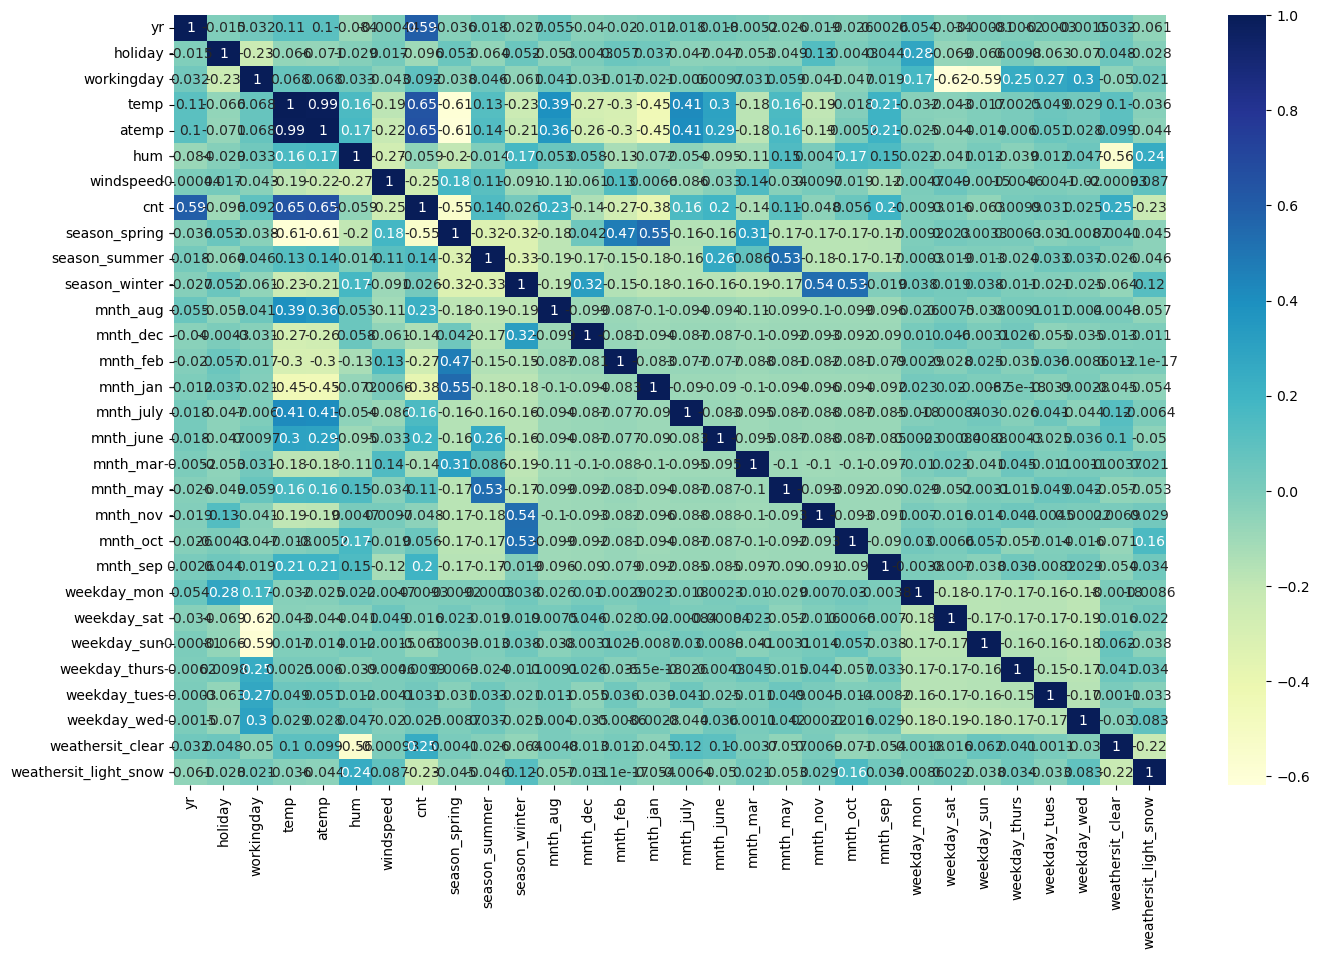

In [28]:
# heat map
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap ="YlGnBu")
plt.show()

In [29]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  season_spring  season_summer  ...  mnth_oct  mnth_sep  \
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   
111  0.191095              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
576            0            0            0              0             1   
426            0            1            0              0             0   
728            0            0            1              0             0   
482            0            1            0              0             0   
111            0            0            0              0             0   

     weekday_wed  weathersit_clear  weathersit_light_snow  
576            0                 1                      0  
426            0                 0                      0  
728            0                 1                      0  
482            0                 0                      0  
111            0                 0                      0  

[5 rows x 30 columns]

- Splitting into train and test

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [32]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

     season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   
111              0              1              0  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
576            0            0            0              0             1   
426            0            1            0              0             0   
728            0            0            1              0             0   
482            0            1            0              0             0   
111            0            0            0              0             0   

     weekday_wed  weathersit_clear  weathersit_light_snow  
576            0                 1                      0  
426            0                 0                      0  
728            0                 1                      0  
482            0                 0                      0  
111            0                 0                      0  

[5 rows x 29 columns]

1. First keep all variables for analysis
2. Find Statistical significance of variables
3. Find VIF

In [33]:
# Add a constant
X_train_sm = sm.add_constant(X_train)
# Create first model with all variables
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()
# Summary
lr_model.summary(())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ()   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.81e-180
Time:                        21:10:20   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1957      0.037      5.228      0.000       0.122       0.269
yr                        0.2325      0.008     28.794      0.000       0.217       0.248
holiday                  -0.0010      0.024     -0.042      0.967      -0.049       0.047
workingday                0.0844      0.013      6.731      0.000       0.060       0.109
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0590      0.138      0.426      0.670      -0.213       0.331
hum                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter             0.1071      0.028      3.826      0.000       0.052       0.162
mnth_aug                  0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_dec                 -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_feb                 -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_jan                 -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_july                -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_june                 0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_mar                  0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_may                  0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_nov                 -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_oct                  0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_sep                  0.0868      0.032      2.711      0.007       0.024       0.150
weekday_mon              -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_sat               0.0833      0.014      5.909      0.000       0.056       0.111
weekday_sun               0.0291      0.014      2.009      0.045       0.001       0.057
weekday_thurs            -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_tues             -0.0184      0.016     -1.184      0.237      -0.049       0.012
weekday_wed              -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_clear          0.0595      0.010      5.701      0.000       0.039       0.080
weathersit_light_snow    -0.1955      0.025     -7.787      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       84.

- Significance of variable(p-values)
- Find VIF 

- Steps(function used):
    - fit()
    - trasnform()
    - fit_transform(0

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2              workingday  95.31
3                    temp  66.90
4                   atemp  56.03
22            weekday_sat  22.08
23            weekday_sun  20.76
7           season_spring  10.77
9           season_winter   9.46
8           season_summer   8.29
18               mnth_nov   6.79
10               mnth_aug   6.47
19               mnth_oct   6.47
13               mnth_jan   5.90
11               mnth_dec   5.68
14              mnth_july   5.64
20               mnth_sep   4.92
1                 holiday   4.91
12               mnth_feb   4.39
16               mnth_mar   3.47
15              mnth_june   2.86
17               mnth_may   2.24
5                     hum   2.05
21            weekday_mon   1.98
26            weekday_wed   1.94
24          weekday_thurs   1.83
25           weekday_tues   1.80
27       weathersit_clear   1.66
6               windspeed   1.30
28  weathersit_light_snow   1.17
0                      yr   1.06

# Variables removal algorithm, used following priority 
- Give priority to P Value
- Priority -1
    - High p-value, High VIF
- Priority -2
    - High-Low:
        - High p-value, low VIF  --- remove these type of variables first
        - Low p-value, high VIF  --- remove these type of variables second 
- Priority -3
    - Low p-value and Low VIF

- Create model without holiday variable and create the model
- Create second, third, and fouth model after removal each in-significant variable and so on


- While analysis following variables are found tobe in-significant and does not much influencing the target varaiable
      - "holiday", "mnth_mar", "mnth_oct", "mnth_june", "atemp", "weekday_wed", "weekday_thurs","mnth_aug"
      - "weekday_tues", "weekday_mon", "mnth_may", "mnth_feb", "weekday_sun", "hum", "temp", "mnth_july", "season_winter"

In [35]:
X = X_train.drop('holiday', axis =1)

In [36]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.81e-180
Time:                        21:10:21   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1947      0.054      3.575      0.000       0.088       0.302
yr                        0.2325      0.008     28.794      0.000       0.217       0.248
workingday                0.0854      0.027      3.196      0.001       0.033       0.138
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0590      0.138      0.426      0.670      -0.213       0.331
hum                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter             0.1071      0.028      3.826      0.000       0.052       0.162
mnth_aug                  0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_dec                 -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_feb                 -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_jan                 -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_july                -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_june                 0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_mar                  0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_may                  0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_nov                 -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_oct                  0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_sep                  0.0868      0.032      2.711      0.007       0.024       0.150
weekday_mon              -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_sat               0.0843      0.030      2.779      0.006       0.025       0.144
weekday_sun               0.0301      0.030      0.989      0.323      -0.030       0.090
weekday_thurs            -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_tues             -0.0184      0.016     -1.184      0.237      -0.049       0.012
weekday_wed              -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_clear          0.0595      0.010      5.701      0.000       0.039       0.080
weathersit_light_snow    -0.1955      0.025     -7.787      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarqu

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  434.07
3                   atemp  382.86
4                     hum   37.00
1              workingday   22.92
6           season_spring   12.55
8           season_winter   12.13
7           season_summer    8.19
21            weekday_sat    6.83
18               mnth_oct    6.46
22            weekday_sun    6.44
9                mnth_aug    6.41
17               mnth_nov    6.31
12               mnth_jan    5.60
13              mnth_july    5.59
5               windspeed    5.51
10               mnth_dec    5.30
19               mnth_sep    4.57
11               mnth_feb    4.17
26       weathersit_clear    4.01
15               mnth_mar    3.56
14              mnth_june    3.05
16               mnth_may    2.45
25            weekday_wed    2.29
20            weekday_mon    2.23
0                      yr    2.15
23          weekday_thurs    2.08
24           weekday_tues    2.05
27  weathersit_light_snow    1.20

In [38]:
X = X.drop('mnth_mar', axis =1)

In [39]:
X_train_sm = sm.add_constant(X)
#create second model
lr = sm.OLS(y_train, X_train_sm)
#fir
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.75e-181
Time:                        21:10:21   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1956      0.052      3.739      0.000       0.093       0.298
yr                        0.2325      0.008     28.824      0.000       0.217       0.248
workingday                0.0854      0.027      3.201      0.001       0.033       0.138
temp                      0.3877      0.142      2.729      0.007       0.109       0.667
atemp                     0.0588      0.138      0.425      0.671      -0.213       0.330
hum                      -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring            -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer             0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter             0.1074      0.027      3.910      0.000       0.053       0.161
mnth_aug                  0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_dec                 -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_feb                 -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_jan                 -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_july                -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_june                 0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_may                  0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_nov                 -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_oct                  0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_sep                  0.0859      0.029      2.961      0.003       0.029       0.143
weekday_mon              -0.0216      0.015     -1.402      0.162      -0.052       0.009
weekday_sat               0.0843      0.030      2.784      0.006       0.025       0.144
weekday_sun               0.0301      0.030      0.990      0.323      -0.030       0.090
weekday_thurs            -0.0097      0.016     -0.622      0.535      -0.040       0.021
weekday_tues             -0.0184      0.016     -1.185      0.237      -0.049       0.012
weekday_wed              -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_clear          0.0595      0.010      5.708      0.000       0.039       0.080
weathersit_light_snow    -0.1954      0.025     -7.795      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):       

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  433.93
3                   atemp  382.21
4                     hum   35.44
1              workingday   22.04
8           season_winter   11.36
6           season_spring    9.90
7           season_summer    8.16
20            weekday_sat    6.56
21            weekday_sun    6.25
9                mnth_aug    5.94
5               windspeed    5.51
13              mnth_july    5.25
17               mnth_oct    4.99
16               mnth_nov    4.85
18               mnth_sep    4.00
25       weathersit_clear    3.96
10               mnth_dec    3.42
14              mnth_june    2.77
12               mnth_jan    2.68
24            weekday_wed    2.28
19            weekday_mon    2.21
0                      yr    2.15
15               mnth_may    2.12
11               mnth_feb    2.07
22          weekday_thurs    2.06
23           weekday_tues    2.05
26  weathersit_light_snow    1.20

In [41]:
X = X.drop('mnth_oct', axis =1)
X_train_sm = sm.add_constant(X)
# Create second model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.68e-182
Time:                        21:10:21   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1976      0.051      3.846      0.000       0.097       0.299
yr                        0.2325      0.008     28.873      0.000       0.217       0.248
workingday                0.0850      0.027      3.197      0.001       0.033       0.137
temp                      0.3882      0.142      2.736      0.006       0.109       0.667
atemp                     0.0589      0.138      0.427      0.670      -0.212       0.330
hum                      -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed                -0.1835      0.026     -6.986      0.000      -0.235      -0.132
season_spring            -0.0460      0.028     -1.655      0.099      -0.101       0.009
season_summer             0.0400      0.024      1.684      0.093      -0.007       0.087
season_winter             0.1101      0.024      4.539      0.000       0.062       0.158
mnth_aug                  0.0190      0.029      0.644      0.520      -0.039       0.077
mnth_dec                 -0.0495      0.018     -2.687      0.007      -0.086      -0.013
mnth_feb                 -0.0349      0.022     -1.608      0.108      -0.078       0.008
mnth_jan                 -0.0657      0.022     -3.010      0.003      -0.109      -0.023
mnth_july                -0.0360      0.031     -1.161      0.246      -0.097       0.025
mnth_june                 0.0043      0.023      0.187      0.852      -0.041       0.049
mnth_may                  0.0246      0.020      1.253      0.211      -0.014       0.063
mnth_nov                 -0.0462      0.019     -2.426      0.016      -0.084      -0.009
mnth_sep                  0.0827      0.025      3.336      0.001       0.034       0.131
weekday_mon              -0.0217      0.015     -1.408      0.160      -0.052       0.009
weekday_sat               0.0839      0.030      2.779      0.006       0.025       0.143
weekday_sun               0.0297      0.030      0.981      0.327      -0.030       0.089
weekday_thurs            -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tues             -0.0185      0.016     -1.190      0.235      -0.049       0.012
weekday_wed              -0.0059      0.015     -0.396      0.693      -0.035       0.023
weathersit_clear          0.0596      0.010      5.721      0.000       0.039       0.080
weathersit_light_snow    -0.1952      0.025     -7.800      0.000      -0.244      -0.146
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                  

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.68e-182
Time:                        21:10:21   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1976      0.051      3.846      0.000       0.097       0.299
yr                        0.2325      0.008     28.873      0.000       0.217       0.248
workingday                0.0850      0.027      3.197      0.001       0.033       0.137
temp                      0.3882      0.142      2.736      0.006       0.109       0.667
atemp                     0.0589      0.138      0.427      0.670      -0.212       0.330
hum                      -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed                -0.1835      0.026     -6.986      0.000      -0.235      -0.132
season_spring            -0.0460      0.028     -1.655      0.099      -0.101       0.009
season_summer             0.0400      0.024      1.684      0.093      -0.007       0.087
season_winter             0.1101      0.024      4.539      0.000       0.062       0.158
mnth_aug                  0.0190      0.029      0.644      0.520      -0.039       0.077
mnth_dec                 -0.0495      0.018     -2.687      0.007      -0.086      -0.013
mnth_feb                 -0.0349      0.022     -1.608      0.108      -0.078       0.008
mnth_jan                 -0.0657      0.022     -3.010      0.003      -0.109      -0.023
mnth_july                -0.0360      0.031     -1.161      0.246      -0.097       0.025
mnth_june                 0.0043      0.023      0.187      0.852      -0.041       0.049
mnth_may                  0.0246      0.020      1.253      0.211      -0.014       0.063
mnth_nov                 -0.0462      0.019     -2.426      0.016      -0.084      -0.009
mnth_sep                  0.0827      0.025      3.336      0.001       0.034       0.131
weekday_mon              -0.0217      0.015     -1.408      0.160      -0.052       0.009
weekday_sat               0.0839      0.030      2.779      0.006       0.025       0.143
weekday_sun               0.0297      0.030      0.981      0.327      -0.030       0.089
weekday_thurs            -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tues             -0.0185      0.016     -1.190      0.235      -0.049       0.012
weekday_wed              -0.0059      0.015     -0.396      0.693      -0.035       0.023
weathersit_clear          0.0596      0.010      5.721      0.000       0.039       0.080
weathersit_light_snow    -0.1952      0.025     -7.800      0.000      -0.244      -0.146
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                  

In [43]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  432.95
3                   atemp  382.20
4                     hum   34.19
1              workingday   22.02
6           season_spring    9.72
8           season_winter    8.06
7           season_summer    7.22
19            weekday_sat    6.55
20            weekday_sun    6.24
5               windspeed    5.46
9                mnth_aug    5.19
13              mnth_july    4.64
24       weathersit_clear    3.93
17               mnth_sep    3.02
14              mnth_june    2.61
12               mnth_jan    2.60
23            weekday_wed    2.28
18            weekday_mon    2.21
0                      yr    2.14
15               mnth_may    2.08
21          weekday_thurs    2.06
22           weekday_tues    2.05
11               mnth_feb    1.99
16               mnth_nov    1.91
10               mnth_dec    1.78
25  weathersit_light_snow    1.20

In [44]:
X = X.drop('mnth_june', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fir
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.55e-183
Time:                        21:10:22   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1977      0.051      3.850      0.000       0.097       0.299
yr                        0.2323      0.008     29.009      0.000       0.217       0.248
workingday                0.0854      0.026      3.226      0.001       0.033       0.137
temp                      0.3961      0.135      2.926      0.004       0.130       0.662
atemp                     0.0554      0.137      0.405      0.685      -0.213       0.324
hum                      -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed                -0.1841      0.026     -7.081      0.000      -0.235      -0.133
season_spring            -0.0474      0.027     -1.771      0.077      -0.100       0.005
season_summer             0.0393      0.023      1.677      0.094      -0.007       0.085
season_winter             0.1086      0.023      4.756      0.000       0.064       0.153
mnth_aug                  0.0157      0.024      0.662      0.508      -0.031       0.062
mnth_dec                 -0.0490      0.018     -2.690      0.007      -0.085      -0.013
mnth_feb                 -0.0343      0.021     -1.599      0.110      -0.077       0.008
mnth_jan                 -0.0648      0.021     -3.045      0.002      -0.107      -0.023
mnth_july                -0.0394      0.025     -1.598      0.111      -0.088       0.009
mnth_may                  0.0229      0.017      1.319      0.188      -0.011       0.057
mnth_nov                 -0.0459      0.019     -2.421      0.016      -0.083      -0.009
mnth_sep                  0.0804      0.021      3.744      0.000       0.038       0.123
weekday_mon              -0.0216      0.015     -1.403      0.161      -0.052       0.009
weekday_sat               0.0844      0.030      2.812      0.005       0.025       0.143
weekday_sun               0.0302      0.030      1.003      0.317      -0.029       0.089
weekday_thurs            -0.0097      0.016     -0.624      0.533      -0.040       0.021
weekday_tues             -0.0185      0.016     -1.190      0.235      -0.049       0.012
weekday_wed              -0.0058      0.015     -0.390      0.697      -0.035       0.023
weathersit_clear          0.0595      0.010      5.725      0.000       0.039       0.080
weathersit_light_snow    -0.1953      0.025     -7.814      0.000      -0.244      -0.146
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                         92.9
==============================================================================

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  393.50
3                   atemp  375.15
4                     hum   33.45
1              workingday   21.82
6           season_spring    8.85
8           season_winter    6.99
7           season_summer    6.99
18            weekday_sat    6.47
19            weekday_sun    6.17
5               windspeed    5.36
23       weathersit_clear    3.92
9                mnth_aug    3.31
13              mnth_july    2.90
12               mnth_jan    2.47
22            weekday_wed    2.28
16               mnth_sep    2.22
17            weekday_mon    2.21
0                      yr    2.12
20          weekday_thurs    2.06
21           weekday_tues    2.05
11               mnth_feb    1.95
15               mnth_nov    1.89
10               mnth_dec    1.74
14               mnth_may    1.62
24  weathersit_light_snow    1.20

In [46]:
X = X.drop('atemp', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.53e-184
Time:                        21:10:22   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1965      0.051      3.837      0.000       0.096       0.297
yr                        0.2323      0.008     29.032      0.000       0.217       0.248
workingday                0.0860      0.026      3.256      0.001       0.034       0.138
temp                      0.4487      0.038     11.669      0.000       0.373       0.524
hum                      -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed                -0.1862      0.025     -7.313      0.000      -0.236      -0.136
season_spring            -0.0466      0.027     -1.747      0.081      -0.099       0.006
season_summer             0.0401      0.023      1.722      0.086      -0.006       0.086
season_winter             0.1096      0.023      4.826      0.000       0.065       0.154
mnth_aug                  0.0150      0.024      0.633      0.527      -0.031       0.061
mnth_dec                 -0.0490      0.018     -2.689      0.007      -0.085      -0.013
mnth_feb                 -0.0344      0.021     -1.602      0.110      -0.077       0.008
mnth_jan                 -0.0650      0.021     -3.059      0.002      -0.107      -0.023
mnth_july                -0.0395      0.025     -1.600      0.110      -0.088       0.009
mnth_may                  0.0226      0.017      1.307      0.192      -0.011       0.057
mnth_nov                 -0.0459      0.019     -2.421      0.016      -0.083      -0.009
mnth_sep                  0.0804      0.021      3.748      0.000       0.038       0.123
weekday_mon              -0.0209      0.015     -1.370      0.171      -0.051       0.009
weekday_sat               0.0854      0.030      2.858      0.004       0.027       0.144
weekday_sun               0.0312      0.030      1.041      0.298      -0.028       0.090
weekday_thurs            -0.0092      0.015     -0.591      0.555      -0.040       0.021
weekday_tues             -0.0180      0.015     -1.164      0.245      -0.048       0.012
weekday_wed              -0.0055      0.015     -0.367      0.714      -0.035       0.024
weathersit_clear          0.0595      0.010      5.737      0.000       0.039       0.080
weathersit_light_snow    -0.1961      0.025     -7.874      0.000      -0.245      -0.147
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  33.42
2                    temp  26.50
1              workingday  21.80
5           season_spring   8.83
6           season_summer   6.95
7           season_winter   6.94
17            weekday_sat   6.45
18            weekday_sun   6.15
4               windspeed   5.09
22       weathersit_clear   3.92
8                mnth_aug   3.28
12              mnth_july   2.90
11               mnth_jan   2.47
21            weekday_wed   2.27
15               mnth_sep   2.22
16            weekday_mon   2.19
0                      yr   2.12
19          weekday_thurs   2.05
20           weekday_tues   2.04
10               mnth_feb   1.95
14               mnth_nov   1.89
9                mnth_dec   1.74
13               mnth_may   1.62
23  weathersit_light_snow   1.19

In [48]:
X = X.drop('weekday_wed', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.42e-185
Time:                        21:10:22   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1946      0.051      3.823      0.000       0.095       0.295
yr                        0.2322      0.008     29.055      0.000       0.217       0.248
workingday                0.0856      0.026      3.248      0.001       0.034       0.137
temp                      0.4483      0.038     11.674      0.000       0.373       0.524
hum                      -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed                -0.1862      0.025     -7.319      0.000      -0.236      -0.136
season_spring            -0.0467      0.027     -1.755      0.080      -0.099       0.006
season_summer             0.0399      0.023      1.716      0.087      -0.006       0.086
season_winter             0.1095      0.023      4.830      0.000       0.065       0.154
mnth_aug                  0.0151      0.024      0.638      0.524      -0.031       0.061
mnth_dec                 -0.0489      0.018     -2.689      0.007      -0.085      -0.013
mnth_feb                 -0.0344      0.021     -1.603      0.110      -0.076       0.008
mnth_jan                 -0.0651      0.021     -3.067      0.002      -0.107      -0.023
mnth_july                -0.0392      0.025     -1.591      0.112      -0.088       0.009
mnth_may                  0.0227      0.017      1.311      0.191      -0.011       0.057
mnth_nov                 -0.0462      0.019     -2.443      0.015      -0.083      -0.009
mnth_sep                  0.0803      0.021      3.746      0.000       0.038       0.122
weekday_mon              -0.0179      0.013     -1.389      0.165      -0.043       0.007
weekday_sat               0.0881      0.029      3.043      0.002       0.031       0.145
weekday_sun               0.0339      0.029      1.168      0.244      -0.023       0.091
weekday_thurs            -0.0061      0.013     -0.467      0.640      -0.032       0.020
weekday_tues             -0.0150      0.013     -1.145      0.253      -0.041       0.011
weathersit_clear          0.0593      0.010      5.730      0.000       0.039       0.080
weathersit_light_snow    -0.1970      0.025     -7.955      0.000      -0.246      -0.148
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  33.13
2                    temp  26.35
1              workingday  21.56
5           season_spring   8.78
7           season_winter   6.93
6           season_summer   6.91
17            weekday_sat   6.11
18            weekday_sun   5.83
4               windspeed   5.09
21       weathersit_clear   3.88
8                mnth_aug   3.28
12              mnth_july   2.90
11               mnth_jan   2.46
15               mnth_sep   2.22
0                      yr   2.12
10               mnth_feb   1.95
14               mnth_nov   1.88
9                mnth_dec   1.74
13               mnth_may   1.62
16            weekday_mon   1.58
19          weekday_thurs   1.47
20           weekday_tues   1.47
22  weathersit_light_snow   1.18

In [50]:
X = X.drop('weekday_thurs', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.36e-186
Time:                        21:10:23   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1922      0.051      3.798      0.000       0.093       0.292
yr                        0.2322      0.008     29.077      0.000       0.217       0.248
workingday                0.0861      0.026      3.269      0.001       0.034       0.138
temp                      0.4484      0.038     11.686      0.000       0.373       0.524
hum                      -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed                -0.1863      0.025     -7.327      0.000      -0.236      -0.136
season_spring            -0.0466      0.027     -1.753      0.080      -0.099       0.006
season_summer             0.0401      0.023      1.726      0.085      -0.006       0.086
season_winter             0.1099      0.023      4.851      0.000       0.065       0.154
mnth_aug                  0.0152      0.024      0.645      0.520      -0.031       0.062
mnth_dec                 -0.0492      0.018     -2.709      0.007      -0.085      -0.014
mnth_feb                 -0.0340      0.021     -1.590      0.112      -0.076       0.008
mnth_jan                 -0.0650      0.021     -3.066      0.002      -0.107      -0.023
mnth_july                -0.0389      0.025     -1.583      0.114      -0.087       0.009
mnth_may                  0.0228      0.017      1.317      0.188      -0.011       0.057
mnth_nov                 -0.0466      0.019     -2.472      0.014      -0.084      -0.010
mnth_sep                  0.0803      0.021      3.747      0.000       0.038       0.122
weekday_mon              -0.0160      0.012     -1.310      0.191      -0.040       0.008
weekday_sat               0.0905      0.028      3.175      0.002       0.034       0.146
weekday_sun               0.0363      0.029      1.268      0.205      -0.020       0.092
weekday_tues             -0.0131      0.012     -1.052      0.293      -0.037       0.011
weathersit_clear          0.0591      0.010      5.719      0.000       0.039       0.079
weathersit_light_snow    -0.1974      0.025     -7.983      0.000      -0.246      -0.149
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  33.07
2                    temp  26.29
1              workingday  21.55
5           season_spring   8.76
7           season_winter   6.93
6           season_summer   6.90
17            weekday_sat   5.99
18            weekday_sun   5.71
4               windspeed   5.08
20       weathersit_clear   3.85
8                mnth_aug   3.27
12              mnth_july   2.90
11               mnth_jan   2.46
15               mnth_sep   2.22
0                      yr   2.12
10               mnth_feb   1.95
14               mnth_nov   1.87
9                mnth_dec   1.74
13               mnth_may   1.62
16            weekday_mon   1.42
19           weekday_tues   1.33
21  weathersit_light_snow   1.18

In [52]:
X = X.drop('mnth_aug', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.47e-187
Time:                        21:10:23   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2006      0.049      4.107      0.000       0.105       0.297
yr                        0.2324      0.008     29.128      0.000       0.217       0.248
workingday                0.0863      0.026      3.282      0.001       0.035       0.138
temp                      0.4502      0.038     11.769      0.000       0.375       0.525
hum                      -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed                -0.1864      0.025     -7.338      0.000      -0.236      -0.137
season_spring            -0.0564      0.022     -2.576      0.010      -0.099      -0.013
season_summer             0.0298      0.017      1.766      0.078      -0.003       0.063
season_winter             0.1009      0.018      5.663      0.000       0.066       0.136
mnth_dec                 -0.0500      0.018     -2.758      0.006      -0.086      -0.014
mnth_feb                 -0.0340      0.021     -1.591      0.112      -0.076       0.008
mnth_jan                 -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_july                -0.0498      0.018     -2.770      0.006      -0.085      -0.014
mnth_may                  0.0224      0.017      1.299      0.195      -0.012       0.056
mnth_nov                 -0.0476      0.019     -2.534      0.012      -0.085      -0.011
mnth_sep                  0.0716      0.017      4.303      0.000       0.039       0.104
weekday_mon              -0.0160      0.012     -1.317      0.188      -0.040       0.008
weekday_sat               0.0911      0.028      3.201      0.001       0.035       0.147
weekday_sun               0.0364      0.029      1.275      0.203      -0.020       0.093
weekday_tues             -0.0129      0.012     -1.040      0.299      -0.037       0.011
weathersit_clear          0.0588      0.010      5.703      0.000       0.039       0.079
weathersit_light_snow    -0.1985      0.025     -8.049      0.000      -0.247      -0.150
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  31.90
2                    temp  25.05
1              workingday  20.71
5           season_spring   6.37
16            weekday_sat   5.73
17            weekday_sun   5.55
4               windspeed   5.05
7           season_winter   4.60
6           season_summer   3.88
19       weathersit_clear   3.83
10               mnth_jan   2.45
0                      yr   2.12
9                mnth_feb   1.94
13               mnth_nov   1.87
8                mnth_dec   1.74
11              mnth_july   1.62
12               mnth_may   1.61
14               mnth_sep   1.42
15            weekday_mon   1.42
18           weekday_tues   1.33
20  weathersit_light_snow   1.17

In [54]:
X = X.drop('weekday_tues', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          3.51e-188
Time:                        21:10:23   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1994      0.049      4.083      0.000       0.103       0.295
yr                        0.2323      0.008     29.122      0.000       0.217       0.248
workingday                0.0856      0.026      3.254      0.001       0.034       0.137
temp                      0.4505      0.038     11.777      0.000       0.375       0.526
hum                      -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed                -0.1869      0.025     -7.358      0.000      -0.237      -0.137
season_spring            -0.0562      0.022     -2.566      0.011      -0.099      -0.013
season_summer             0.0296      0.017      1.751      0.081      -0.004       0.063
season_winter             0.1004      0.018      5.639      0.000       0.065       0.135
mnth_dec                 -0.0492      0.018     -2.718      0.007      -0.085      -0.014
mnth_feb                 -0.0350      0.021     -1.636      0.102      -0.077       0.007
mnth_jan                 -0.0649      0.021     -3.062      0.002      -0.107      -0.023
mnth_july                -0.0507      0.018     -2.825      0.005      -0.086      -0.015
mnth_may                  0.0222      0.017      1.285      0.199      -0.012       0.056
mnth_nov                 -0.0475      0.019     -2.525      0.012      -0.084      -0.011
mnth_sep                  0.0718      0.017      4.314      0.000       0.039       0.104
weekday_mon              -0.0130      0.012     -1.102      0.271      -0.036       0.010
weekday_sat               0.0934      0.028      3.289      0.001       0.038       0.149
weekday_sun               0.0389      0.029      1.364      0.173      -0.017       0.095
weathersit_clear          0.0586      0.010      5.683      0.000       0.038       0.079
weathersit_light_snow    -0.1971      0.025     -8.005      0.000      -0.246      -0.149
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  31.82
2                    temp  25.05
1              workingday  20.66
5           season_spring   6.37
16            weekday_sat   5.70
17            weekday_sun   5.51
4               windspeed   5.05
7           season_winter   4.59
6           season_summer   3.88
18       weathersit_clear   3.83
10               mnth_jan   2.45
0                      yr   2.12
9                mnth_feb   1.94
13               mnth_nov   1.87
8                mnth_dec   1.73
12               mnth_may   1.61
11              mnth_july   1.61
14               mnth_sep   1.42
15            weekday_mon   1.34
19  weathersit_light_snow   1.17

In [56]:
X = X.drop('weekday_mon', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          5.20e-189
Time:                        21:10:24   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1895      0.048      3.947      0.000       0.095       0.284
yr                        0.2318      0.008     29.103      0.000       0.216       0.247
workingday                0.0933      0.025      3.679      0.000       0.043       0.143
temp                      0.4527      0.038     11.846      0.000       0.378       0.528
hum                      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                -0.1873      0.025     -7.371      0.000      -0.237      -0.137
season_spring            -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_summer             0.0295      0.017      1.747      0.081      -0.004       0.063
season_winter             0.1001      0.018      5.618      0.000       0.065       0.135
mnth_dec                 -0.0488      0.018     -2.692      0.007      -0.084      -0.013
mnth_feb                 -0.0348      0.021     -1.626      0.105      -0.077       0.007
mnth_jan                 -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_july                -0.0510      0.018     -2.844      0.005      -0.086      -0.016
mnth_may                  0.0229      0.017      1.325      0.186      -0.011       0.057
mnth_nov                 -0.0461      0.019     -2.456      0.014      -0.083      -0.009
mnth_sep                  0.0723      0.017      4.349      0.000       0.040       0.105
weekday_sat               0.1036      0.027      3.864      0.000       0.051       0.156
weekday_sun               0.0492      0.027      1.827      0.068      -0.004       0.102
weathersit_clear          0.0583      0.010      5.655      0.000       0.038       0.079
weathersit_light_snow    -0.1966      0.025     -7.983      0.000      -0.245      -0.148
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  31.03
2                    temp  25.00
1              workingday  19.84
5           season_spring   6.35
15            weekday_sat   5.26
16            weekday_sun   5.09
4               windspeed   5.02
7           season_winter   4.56
6           season_summer   3.85
17       weathersit_clear   3.79
10               mnth_jan   2.45
0                      yr   2.11
9                mnth_feb   1.94
13               mnth_nov   1.87
8                mnth_dec   1.73
11              mnth_july   1.61
12               mnth_may   1.60
14               mnth_sep   1.42
18  weathersit_light_snow   1.17

In [58]:
X = X.drop('mnth_may', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fir
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          9.80e-190
Time:                        21:10:24   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1783      0.047      3.770      0.000       0.085       0.271
yr                        0.2312      0.008     29.052      0.000       0.216       0.247
workingday                0.0942      0.025      3.713      0.000       0.044       0.144
temp                      0.4616      0.038     12.262      0.000       0.388       0.536
hum                      -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                -0.1889      0.025     -7.441      0.000      -0.239      -0.139
season_spring            -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_summer             0.0393      0.015      2.586      0.010       0.009       0.069
season_winter             0.1021      0.018      5.752      0.000       0.067       0.137
mnth_dec                 -0.0474      0.018     -2.619      0.009      -0.083      -0.012
mnth_feb                 -0.0334      0.021     -1.562      0.119      -0.075       0.009
mnth_jan                 -0.0634      0.021     -2.991      0.003      -0.105      -0.022
mnth_july                -0.0515      0.018     -2.868      0.004      -0.087      -0.016
mnth_nov                 -0.0444      0.019     -2.371      0.018      -0.081      -0.008
mnth_sep                  0.0723      0.017      4.346      0.000       0.040       0.105
weekday_sat               0.1040      0.027      3.875      0.000       0.051       0.157
weekday_sun               0.0500      0.027      1.855      0.064      -0.003       0.103
weathersit_clear          0.0585      0.010      5.668      0.000       0.038       0.079
weathersit_light_snow    -0.1982      0.025     -8.054      0.000      -0.247      -0.150
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  30.98
2                    temp  24.72
1              workingday  19.70
5           season_spring   6.33
14            weekday_sat   5.21
15            weekday_sun   5.06
4               windspeed   4.95
7           season_winter   4.55
16       weathersit_clear   3.78
6           season_summer   3.21
10               mnth_jan   2.44
0                      yr   2.10
9                mnth_feb   1.93
12               mnth_nov   1.87
8                mnth_dec   1.73
11              mnth_july   1.61
13               mnth_sep   1.42
17  weathersit_light_snow   1.17

In [60]:
X = X.drop('mnth_feb', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.52e-190
Time:                        21:10:24   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1653      0.047      3.545      0.000       0.074       0.257
yr                        0.2309      0.008     28.978      0.000       0.215       0.247
workingday                0.0964      0.025      3.801      0.000       0.047       0.146
temp                      0.4764      0.036     13.064      0.000       0.405       0.548
hum                      -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                -0.1879      0.025     -7.390      0.000      -0.238      -0.138
season_spring            -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer             0.0424      0.015      2.809      0.005       0.013       0.072
season_winter             0.1038      0.018      5.845      0.000       0.069       0.139
mnth_dec                 -0.0388      0.017     -2.248      0.025      -0.073      -0.005
mnth_jan                 -0.0455      0.018     -2.548      0.011      -0.081      -0.010
mnth_july                -0.0524      0.018     -2.916      0.004      -0.088      -0.017
mnth_nov                 -0.0399      0.019     -2.152      0.032      -0.076      -0.003
mnth_sep                  0.0737      0.017      4.430      0.000       0.041       0.106
weekday_sat               0.1068      0.027      3.984      0.000       0.054       0.160
weekday_sun               0.0520      0.027      1.931      0.054      -0.001       0.105
weathersit_clear          0.0583      0.010      5.637      0.000       0.038       0.079
weathersit_light_snow    -0.1972      0.025     -8.004      0.000      -0.246      -0.149
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  30.41
2                    temp  23.77
1              workingday  19.64
5           season_spring   5.43
13            weekday_sat   5.21
14            weekday_sun   5.05
4               windspeed   4.95
7           season_winter   4.55
15       weathersit_clear   3.75
6           season_summer   3.19
0                      yr   2.10
11               mnth_nov   1.84
9                mnth_jan   1.78
10              mnth_july   1.61
8                mnth_dec   1.60
12               mnth_sep   1.42
16  weathersit_light_snow   1.16

In [62]:
X = X.drop('weekday_sun', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.20e-190
Time:                        21:10:24   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2109      0.040      5.236      0.000       0.132       0.290
yr                        0.2311      0.008     28.929      0.000       0.215       0.247
workingday                0.0521      0.011      4.826      0.000       0.031       0.073
temp                      0.4744      0.037     12.978      0.000       0.403       0.546
hum                      -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                -0.1883      0.025     -7.386      0.000      -0.238      -0.138
season_spring            -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_summer             0.0421      0.015      2.783      0.006       0.012       0.072
season_winter             0.1038      0.018      5.832      0.000       0.069       0.139
mnth_dec                 -0.0398      0.017     -2.302      0.022      -0.074      -0.006
mnth_jan                 -0.0465      0.018     -2.596      0.010      -0.082      -0.011
mnth_july                -0.0514      0.018     -2.854      0.004      -0.087      -0.016
mnth_nov                 -0.0441      0.018     -2.390      0.017      -0.080      -0.008
mnth_sep                  0.0714      0.017      4.289      0.000       0.039       0.104
weekday_sat               0.0625      0.014      4.493      0.000       0.035       0.090
weathersit_clear          0.0581      0.010      5.607      0.000       0.038       0.078
weathersit_light_snow    -0.1971      0.025     -7.977      0.000      -0.246      -0.149
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  26.32
2                    temp  22.24
5           season_spring   5.06
1              workingday   4.76
4               windspeed   4.75
7           season_winter   4.36
14       weathersit_clear   3.56
6           season_summer   3.04
0                      yr   2.09
13            weekday_sat   1.85
11               mnth_nov   1.84
9                mnth_jan   1.77
10              mnth_july   1.60
8                mnth_dec   1.59
12               mnth_sep   1.42
15  weathersit_light_snow   1.16

In [64]:
#- High-low:
#    - High P value, low VIF  --- remove these type of value first
#    - Low p, high VIF        --- remove these type of value second 

In [65]:
X = X.drop('hum', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.84e-188
Time:                        21:10:25   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1167      0.033      3.542      0.000       0.052       0.181
yr                        0.2348      0.008     29.173      0.000       0.219       0.251
workingday                0.0547      0.011      5.009      0.000       0.033       0.076
temp                      0.4354      0.036     12.191      0.000       0.365       0.506
windspeed                -0.1609      0.025     -6.464      0.000      -0.210      -0.112
season_spring            -0.0713      0.021     -3.371      0.001      -0.113      -0.030
season_summer             0.0354      0.015      2.320      0.021       0.005       0.065
season_winter             0.0903      0.018      5.093      0.000       0.055       0.125
mnth_dec                 -0.0467      0.017     -2.675      0.008      -0.081      -0.012
mnth_jan                 -0.0526      0.018     -2.905      0.004      -0.088      -0.017
mnth_july                -0.0466      0.018     -2.554      0.011      -0.082      -0.011
mnth_nov                 -0.0447      0.019     -2.389      0.017      -0.081      -0.008
mnth_sep                  0.0652      0.017      3.880      0.000       0.032       0.098
weekday_sat               0.0670      0.014      4.758      0.000       0.039       0.095
weathersit_clear          0.0818      0.009      9.526      0.000       0.065       0.099
weathersit_light_snow    -0.2152      0.025     -8.732      0.000      -0.264      -0.167
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                    temp  7.79
3               windspeed  4.74
1              workingday  4.69
4           season_spring  3.21
6           season_winter  3.01
13       weathersit_clear  2.86
5           season_summer  2.32
0                      yr  2.08
12            weekday_sat  1.85
10               mnth_nov  1.80
8                mnth_jan  1.66
9               mnth_july  1.60
7                mnth_dec  1.49
11               mnth_sep  1.34
14  weathersit_light_snow  1.12

In [67]:
X = X.drop('temp', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.73e-161
Time:                        21:10:25   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4565      0.020     22.796      0.000       0.417       0.496
yr                        0.2459      0.009     26.987      0.000       0.228       0.264
workingday                0.0562      0.012      4.516      0.000       0.032       0.081
windspeed                -0.1920      0.028     -6.807      0.000      -0.247      -0.137
season_spring            -0.2487      0.017    -14.223      0.000      -0.283      -0.214
season_summer            -0.0485      0.016     -3.127      0.002      -0.079      -0.018
season_winter            -0.0186      0.017     -1.069      0.286      -0.053       0.016
mnth_dec                 -0.1119      0.019     -5.907      0.000      -0.149      -0.075
mnth_jan                 -0.1221      0.020     -6.237      0.000      -0.161      -0.084
mnth_july                -0.0149      0.021     -0.725      0.469      -0.055       0.025
mnth_nov                 -0.1037      0.021     -5.033      0.000      -0.144      -0.063
mnth_sep                  0.0503      0.019      2.633      0.009       0.013       0.088
weekday_sat               0.0660      0.016      4.113      0.000       0.034       0.097
weathersit_clear          0.0887      0.010      9.093      0.000       0.070       0.108
weathersit_light_snow    -0.2284      0.028     -8.142      0.000      -0.283      -0.173
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               windspeed  4.39
1              workingday  3.55
3           season_spring  3.09
5           season_winter  3.00
12       weathersit_clear  2.52
4           season_summer  2.27
0                      yr  1.93
9                mnth_nov  1.78
7                mnth_jan  1.64
11            weekday_sat  1.63
6                mnth_dec  1.47
8               mnth_july  1.36
10               mnth_sep  1.24
13  weathersit_light_snow  1.12

In [69]:
X = X.drop('mnth_july', axis =1)
X_train_sm = sm.add_constant(X)
# Create second model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.80e-162
Time:                        21:10:25   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4512      0.019     24.216      0.000       0.415       0.488
yr                        0.2460      0.009     27.007      0.000       0.228       0.264
workingday                0.0565      0.012      4.544      0.000       0.032       0.081
windspeed                -0.1919      0.028     -6.806      0.000      -0.247      -0.136
season_spring            -0.2435      0.016    -15.318      0.000      -0.275      -0.212
season_summer            -0.0432      0.014     -3.159      0.002      -0.070      -0.016
season_winter            -0.0139      0.016     -0.861      0.390      -0.046       0.018
mnth_dec                 -0.1115      0.019     -5.889      0.000      -0.149      -0.074
mnth_jan                 -0.1221      0.020     -6.239      0.000      -0.161      -0.084
mnth_nov                 -0.1030      0.021     -5.007      0.000      -0.143      -0.063
mnth_sep                  0.0546      0.018      3.005      0.003       0.019       0.090
weekday_sat               0.0661      0.016      4.123      0.000       0.035       0.098
weathersit_clear          0.0882      0.010      9.069      0.000       0.069       0.107
weathersit_light_snow    -0.2290      0.028     -8.171      0.000      -0.284      -0.174
==============================================================================
Omnibus:                       67.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.757
Skew:                          -0.670   Prob(JB):                     8.33e-38
Kurtosis:                       5.498   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               windspeed  4.29
1              workingday  3.38
5           season_winter  2.80
3           season_spring  2.77
11       weathersit_clear  2.39
4           season_summer  1.97
0                      yr  1.92
8                mnth_nov  1.78
7                mnth_jan  1.64
10            weekday_sat  1.58
6                mnth_dec  1.47
9                mnth_sep  1.19
12  weathersit_light_snow  1.12

In [71]:
X = X.drop('season_winter', axis =1)
X_train_sm = sm.add_constant(X)
# Create next model
lr = sm.OLS(y_train, X_train_sm)
# Fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.00e-163
Time:                        21:10:25   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4459      0.018     25.388      0.000       0.411       0.480
yr                        0.2461      0.009     27.027      0.000       0.228       0.264
workingday                0.0571      0.012      4.600      0.000       0.033       0.081
windspeed                -0.1926      0.028     -6.836      0.000      -0.248      -0.137
season_spring            -0.2376      0.014    -16.537      0.000      -0.266      -0.209
season_summer            -0.0385      0.013     -3.070      0.002      -0.063      -0.014
mnth_dec                 -0.1183      0.017     -6.880      0.000      -0.152      -0.085
mnth_jan                 -0.1232      0.020     -6.315      0.000      -0.162      -0.085
mnth_nov                 -0.1122      0.018     -6.376      0.000      -0.147      -0.078
mnth_sep                  0.0563      0.018      3.116      0.002       0.021       0.092
weekday_sat               0.0664      0.016      4.146      0.000       0.035       0.098
weathersit_clear          0.0890      0.010      9.183      0.000       0.070       0.108
weathersit_light_snow    -0.2312      0.028     -8.291      0.000      -0.286      -0.176
==============================================================================
Omnibus:                       70.521   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.014
Skew:                          -0.692   Prob(JB):                     6.68e-41
Kurtosis:                       5.606   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After analysis following variables are found tobe in-significant and does not much influencing the target varaiable
      - "holiday", "mnth_mar", "mnth_oct", "mnth_june", "atemp", "weekday_wed", "weekday_thurs","mnth_aug"
      - "weekday_tues", "weekday_mon", "mnth_may", "mnth_feb", "weekday_sun", "hum", "temp", "mnth_july", "season_winter"

In [72]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               windspeed  4.14
1              workingday  3.27
3           season_spring  2.39
10       weathersit_clear  2.38
0                      yr  1.91
4           season_summer  1.77
6                mnth_jan  1.62
9             weekday_sat  1.55
7                mnth_nov  1.23
8                mnth_sep  1.19
5                mnth_dec  1.16
11  weathersit_light_snow  1.10

## Step-4: Residual Analysis

In [73]:
# residual analysis
y_train_pred = lr_model.predict(X_train_sm)

In [74]:
y_train_pred

576    0.787034
426    0.471571
728    0.297298
482    0.683529
111    0.391055
         ...   
578    0.801971
53     0.332879
350    0.310837
79     0.362374
520    0.641246
Length: 510, dtype: float64

<Axes: ylabel='Density'>

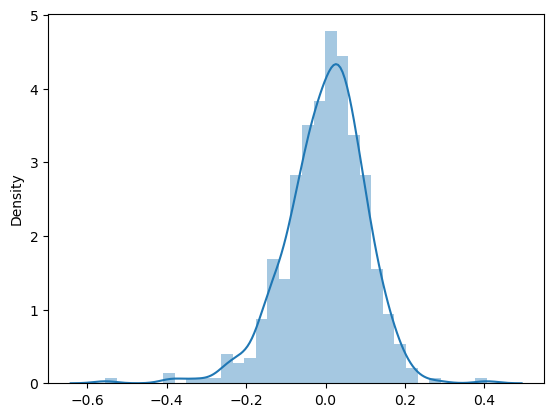

In [75]:
res = y_train - y_train_pred
sns.distplot(res)

In [76]:
# Ceate a list of numeric variable 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Fit on data, resclae only numeric variables
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_spring  season_summer  ...  mnth_oct  mnth_sep  \
184  0.692706              0              0  ...         0         0   
535  0.712034              0              1  ...         0         0   
299  0.303382              0              0  ...         1         0   
221  0.547400              0              0  ...         0         0   
152  0.569029              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
184            1            0            0              0             0   
535            0            0            0              0             0   
299            0            0            0              1             0   
221            0            0            0              0             0   
152            0            0            0              1             0   

     weekday_wed  weathersit_clear  weathersit_light_snow  
184            0                 0                      0  
535            1                 1                      0  
299            0                 0                      0  
221            1                 1                      0  
152            0                 1                      0  

[5 rows x 30 columns]

In [77]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  ...    mnth_oct  \
count  220.000000  220.000000     220.000000     220.000000  ...  220.000000   
mean     0.313293    0.522154       0.254545       0.263636  ...    0.086364   
std      0.159584    0.219163       0.436599       0.441609  ...    0.281541   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198843    0.378595       0.000000       0.000000  ...    0.000000   
50%      0.300126    0.524678       0.000000       0.000000  ...    0.000000   
75%      0.402718    0.677750       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

         mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thurs  \
count  220.000000   220.000000   220.000000   220.000000     220.000000   
mean     0.086364     0.127273     0.118182     0.145455       0.163636   
std      0.281541     0.334038     0.323559     0.353363       0.370789   
min      0.000000     0.000000     0.000000     0.000000       0.000000   
25%      0.000000     0.000000     0.000000     0.000000       0.000000   
50%      0.000000     0.000000     0.000000     0.000000       0.000000   
75%      0.000000     0.000000     0.000000     0.000000       0.000000   
max      1.000000     1.000000     1.000000     1.000000       1.000000   

       weekday_tues  weekday_wed  weathersit_clear  weathersit_light_snow  
count    220.000000   220.000000        220.000000             220.000000  
mean       0.168182     0.100000          0.654545               0.027273  
std        0.374881     0.300684          0.476601               0.163248  
min        0.000000     0.000000          0.000000               0.000000  
25%        0.000000     0.000000          0.000000               0.000000  
50%        0.000000     0.000000          1.000000               0.000000  
75%        0.000000     0.000000          1.000000               0.000000  
max        1.000000     1.000000          1.000000               1.000000  

[8 rows x 30 columns]

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           1  0.817246  0.741471  0.314298   0.537414   

     season_spring  season_summer  ...  mnth_oct  mnth_sep  weekday_mon  \
184              0              0  ...         0         0            1   
535              0              1  ...         0         0            0   
299              0              0  ...         1         0            0   
221              0              0  ...         0         0            0   
152              0              1  ...         0         0            0   

     weekday_sat  weekday_sun  weekday_thurs  weekday_tues  weekday_wed  \
184            0            0              0             0            0   
535            0            0              0             0            1   
299            0            0              1             0            0   
221            0            0              0             0            1   
152            0            0              1             0            0   

     weathersit_clear  weathersit_light_snow  
184                 0                      0  
535                 1                      0  
299                 0                      0  
221                 1                      0  
152                 1                      0  

[5 rows x 30 columns]

In [80]:
X_test_sm = X_test_sm.drop(["holiday", "mnth_mar", "mnth_oct", "mnth_june", "atemp", "weekday_wed", "weekday_thurs","mnth_aug", "weekday_tues", "weekday_mon", "mnth_may", "mnth_feb", "weekday_sun", "hum", "temp", "mnth_july", "season_winter"], axis =1)

## Step-5: Prediction and evaluation on test data

In [81]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [82]:
r2_score(y_true = y_test, y_pred=y_test_pred)

0.7852321368887244

## In the final model we got a pretty reasonable R2 value (0.7852321) on the test set and it is very close to the train set R2 value (0.797)